# Task 1 - Data Science and Data Analytics using python!

##### import necsessary lib

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

#### read student-mat.csv file using pandas

In [4]:
df = pd.read_csv("student-mat.csv", sep = ";")

In [5]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
df.shape

(395, 33)

#### find null and remove duplicates

In [7]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(395, 33)

#### data types of each column

In [10]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

#### 3.1 avg final grade of G3

- mean() gives the avg

In [11]:
df['G3'].mean()

np.float64(10.415189873417722)

- rounded off to 4 decimal places

In [12]:
round(df['G3'].mean(), 4)

np.float64(10.4152)

#### 3.2 students scored above 15

In [13]:
(df['G3'] > 15).sum()

np.int64(40)

#### 3.3 Study time correlated with performance?
- calc the correlation between studytime and g3 columns 
- calculates pearson correlation by default
- using matplotlib, we can plot the graph if neccessary
- close to +1 (+ve correlation), 0(no correlation), -1(-ve correlation)

In [14]:
df[['studytime', 'G3']].corr()

,studytime,G3
studytime,1.00000,0.09782
G3,0.09782,1.00000


- below is the scatter plot for the correlation 

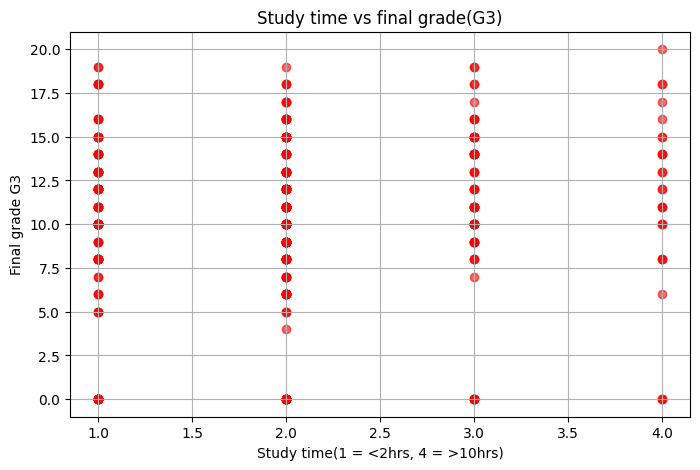

In [15]:
plt.figure(figsize=(8,5))
plt.scatter(df['studytime'], df['G3'], color = 'red', alpha = 0.6)
plt.title("Study time vs final grade(G3)")
plt.xlabel("Study time(1 = <2hrs, 4 = >10hrs)")
plt.ylabel("Final grade G3")
plt.grid(True)
plt.show()

#### 3.4 Which gender perfroms better on avg?

- groupy('sex') groups the dataframe by the values in the column 'sex' ie F/M 
- mean() computes the mean for both

In [16]:
df.groupby('sex')['G3'].mean()

sex
F     9.966346
M    10.914439
Name: G3, dtype: float64

- another way to tell using idxmax()
- idxmax() returns the index lavel of max value

In [17]:
winner = df.groupby('sex')['G3'].mean().idxmax()
print(f"{winner} group performed better on an average.")

M group performed better on an average.


#### 4.1 Histogram of grades

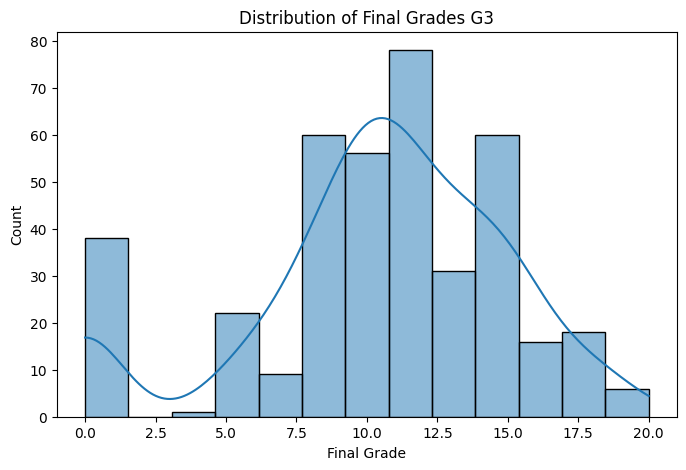

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['G3'], kde = True)
plt.title("Distribution of Final Grades G3")
plt.xlabel("Final Grade")
plt.ylabel("Count")
plt.show()

#### 4.2 Scatter plot study time vs grades

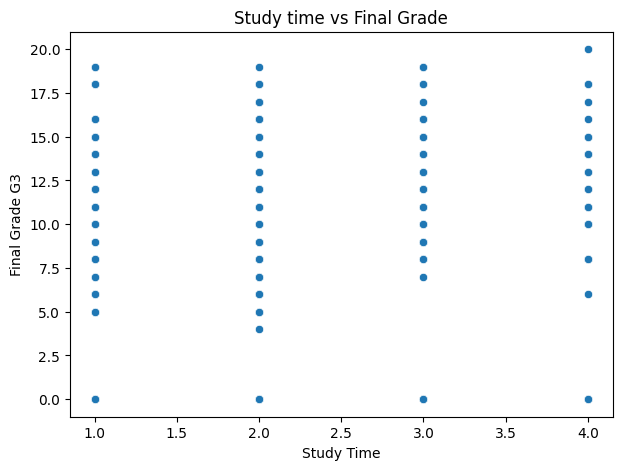

In [19]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='studytime', y='G3')
plt.title("Study time vs Final Grade")
plt.xlabel("Study Time")
plt.ylabel("Final Grade G3")
plt.show()

#### 4.3 Bar Chart: male vs female avg score

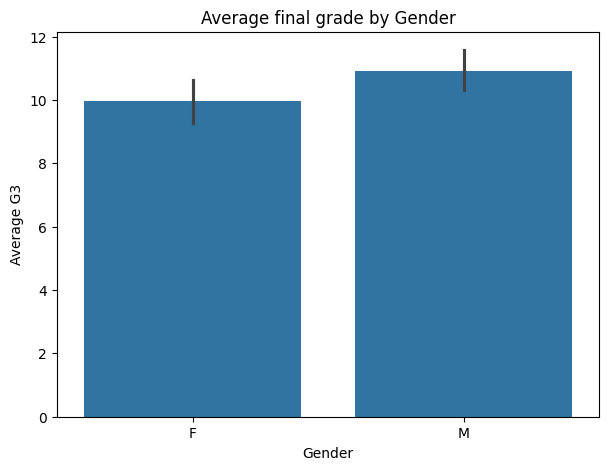

In [20]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x= 'sex', y='G3')
plt.title("Average final grade by Gender")
plt.xlabel("Gender")
plt.ylabel("Average G3")
plt.show()